### Demo for reading high-water marks 
Fields in the .csv file are described here: https://my.usgs.gov/confluence/display/WSN/STN+Data+Dictionary+-+Top+Level

Values for `hwm_type_id`
```
HWM type code.  Current possibilities:
1 Mud
2 Debris
3 Clear water
4 Vegetation line
5 Seed line
6 Stain line
7 Melted snow line
8 Present at peak (direct observation)
9 Other (Note in Description box)
```
Values for `hwm_quality_id`
```
HWM quality code.  Current possibilities:
1 Excellent: +/- 0.05 ft
2 Good: +/- 0.10 ft
3 Fair: +/- 0.20 ft
4 Poor: +/- 0.40 ft
5 VP: > 0.40 ft
6 Unknown/Historical
```



In [20]:
import pandas as pd
import numpy as np
import geopandas

hwm_file = r'/vortexfs1/home/csherwood/proj/NOPP/data/FilteredHWMs.csv'

df = pd.read_csv(hwm_file)
df

,latitude,longitude,eventName,hwmTypeName,hwmQualityName,verticalDatumName,verticalMethodName,approvalMember,markerName,horizontalMethodName,...,event,peak_summary,survey_member,marker,approval,files,site,vertical_datums,flag_member,Links
0,27.265787,-82.551233,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,Level Gun,NaN,NaN,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
1,27.113984,-82.465796,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,Level Gun,Kevin Grimsley,Not marked,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
2,29.286538,-81.054583,2022 Ian,Debris,Good: +/- 0.10 ft,NAVD88,Level Gun,Patrick Ryan,NaN,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
3,29.286667,-81.054639,2022 Ian,Seed line,Excellent: +/- 0.05 ft,NAVD88,Level Gun,Patrick Ryan,NaN,Map (digital or paper),...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
4,28.623731,-80.795234,2022 Ian,Seed line,Fair: +/- 0.20 ft,NAVD88,Level Gun,Kevin Grimsley,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,28.545330,-81.371224,2022 Ian,Seed line,Fair: +/- 0.20 ft,NAVD88,RT-GNSS,John Storm,Marker,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
360,28.534942,-81.336802,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,RT-GNSS,John Storm,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
361,28.534942,-81.336802,2022 Ian,Debris,Poor: +/- 0.40 ft,NAVD88,RT-GNSS,John Storm,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN
362,26.667526,-81.879386,2022 Ian,Seed line,Good: +/- 0.10 ft,NAVD88,RT-GNSS,Missing Approval,NaN,Phone/Car GPS,...,NaN,NaN,NaN,NaN,NaN,System.Collections.Generic.HashSet`1[STNDB.file],NaN,NaN,NaN,NaN


### Pull a subset of data from the dataframe. 
All of the data for H. Ian are in NAVD88, so not testing for that.

In [29]:
# Pull data we want into a "short" dataset
dfs = df[['latitude_dd','longitude_dd','elev_ft','uncertainty','height_above_gnd','hwm_type_id','hwm_quality_id','stillwater']].copy()

# add some columns
dfs['elev_m'] = dfs['elev_ft'].values * 0.3048
dfs['uncertainty_m'] = dfs['uncertainty'].values * 0.3048
dfs['height_above_gnd_m'] = dfs['height_above_gnd'].values * 0.3048

# delete some columns
dfs.drop(['elev_ft','uncertainty','height_above_gnd'], axis = 1, inplace=True )

# get the statistics for each column
# note: not all of the columns have data...some are missing uncertainty and/or height_above_ground
dfs.describe()

,latitude_dd,longitude_dd,hwm_type_id,hwm_quality_id,stillwater,elev_m,uncertainty_m,height_above_gnd_m
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,296.000000,343.000000
mean,27.111323,-81.735916,4.587912,1.967033,0.131868,4.541453,0.039560,0.935478
std,1.583946,0.728046,1.108677,0.958656,0.338813,6.115265,0.133485,0.772790
min,24.546980,-82.551233,1.000000,1.000000,0.000000,0.228600,0.000305,0.000000
25%,26.438324,-82.023910,5.000000,1.000000,0.000000,2.103120,0.015240,0.289560
50%,26.546202,-81.859483,5.000000,2.000000,0.000000,2.636520,0.025603,0.758952
75%,26.716158,-81.731027,5.000000,2.000000,0.000000,3.535680,0.052426,1.450848
max,38.790490,-75.140640,9.000000,5.000000,1.000000,30.845760,2.286000,3.797808


<AxesSubplot: xlabel='longitude_dd', ylabel='latitude_dd'>

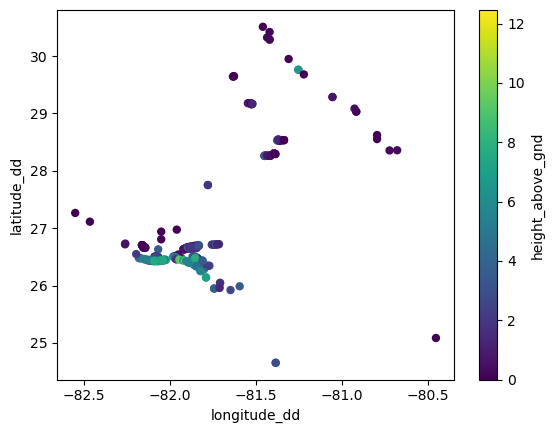

In [14]:
# For fun, make a map of the height above ground
dfs.plot.scatter(x='longitude_dd', y='latitude_dd', s = 25, c = 'height_above_gnd' )

In [30]:
tlat = 27.8
tlon = -81.7

dlon = dfs['longitude_dd'].values - tlon
dlat = dfs['latitude_dd'].values - tlat
a =
# Modified after https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
def haversine_np(tlon, tlat, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon =  - tlon
    dlat = lat2 - tlat

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km